In [1]:
import mrtm
import elastictransformer as et
import torch

params = et.ParameterProvider("series-weather.config")

dataset = et.CustomDataSet('dane_pogodowe.csv',window_length=720,prediction_window=30)

device_id = torch.cuda.current_device()


runner = mrtm.MRTM(et.ElasticTransformer(config=params).cuda(device_id),dump_name="dumps",dump_folder="./dumps")

train_dataset, test_dataset = dataset.getSets()

runner.run(1,5,torch.cuda.current_device(),train_dataset,25,train_dataset,0.15,0.1,0.35,2.0,4,4,backup_delay=1)


c:\Users\trzci\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


['averagePm10', 'averageAirTemp', 'averageRelativeHumidity', 'averageWindSpeed', 'rainAccumulation', 'day', 'month', 'year']
Epoch 0 of 5
Epoch loss: 0.8329639136791229
Epoch 1 of 5
Epoch loss: 0.4497673027217388
Epoch 2 of 5
Epoch loss: 0.2104749046266079
Epoch 3 of 5
Epoch loss: 0.0863800598308444
Epoch 4 of 5
Epoch loss: 0.05270510818809271
Epoch:  0  running loss:  0.05270510818809271
Scores assigned
hris (encoders)
0.21128856368212914
hris (decoders)
0.13638618139749523
adding a head
removing a head
0.2439750182371333
heads:
encoders:
1
decoders:
1 , 1


One or more directories in './dumps' already exist.


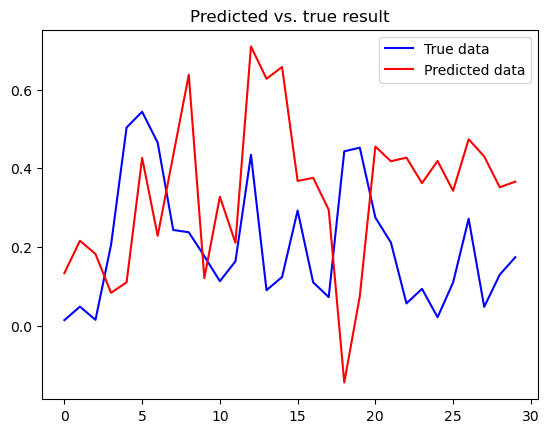

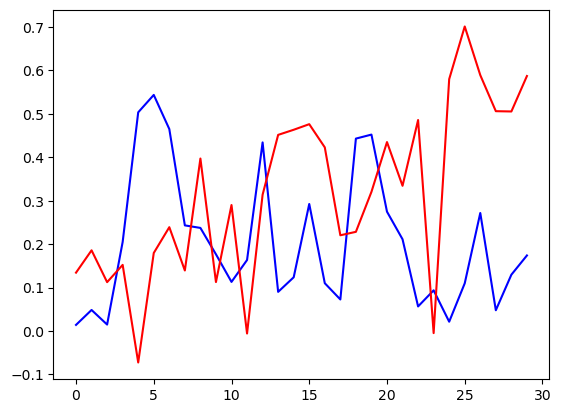

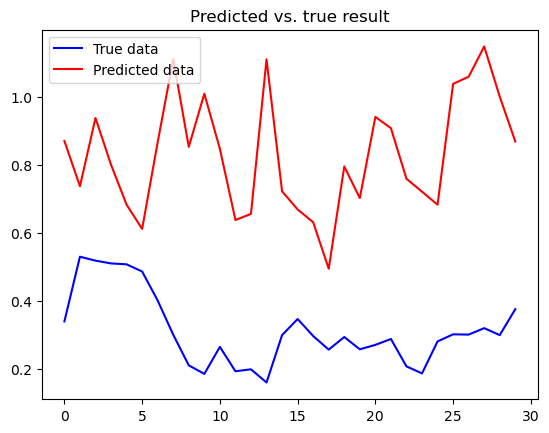

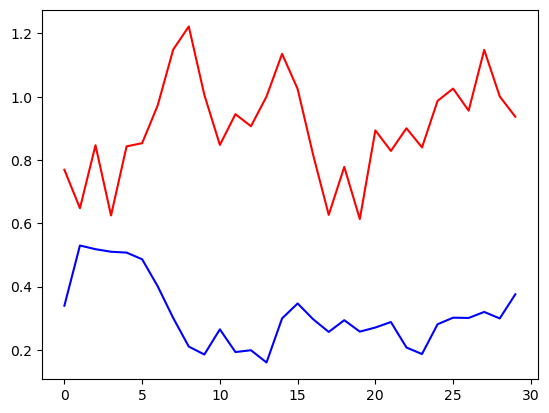

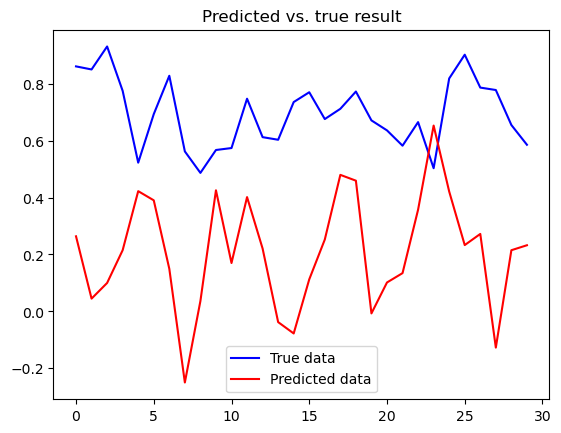

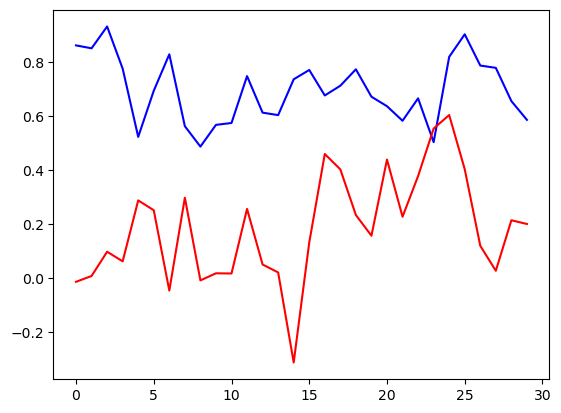

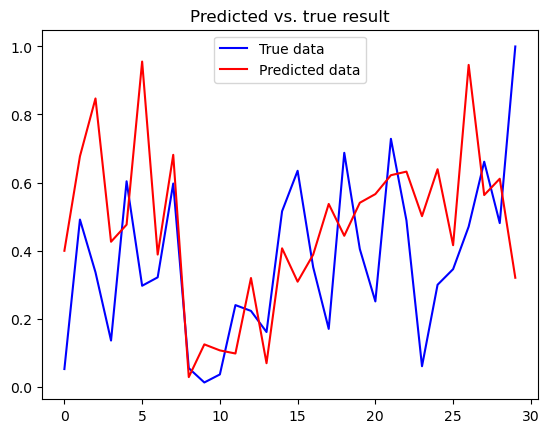

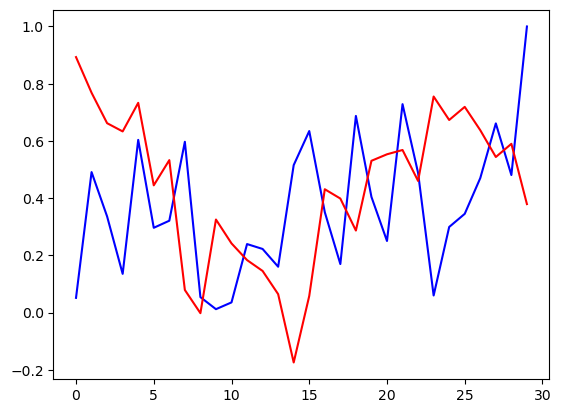

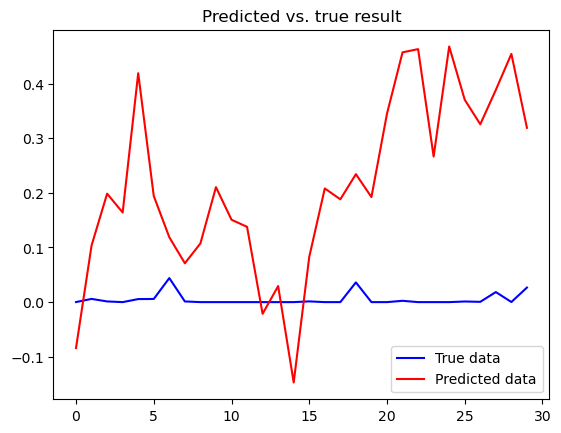

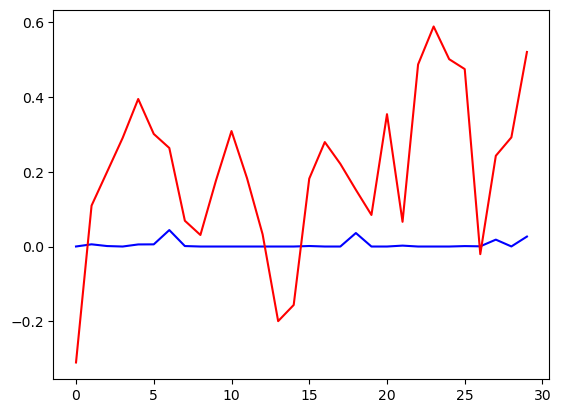

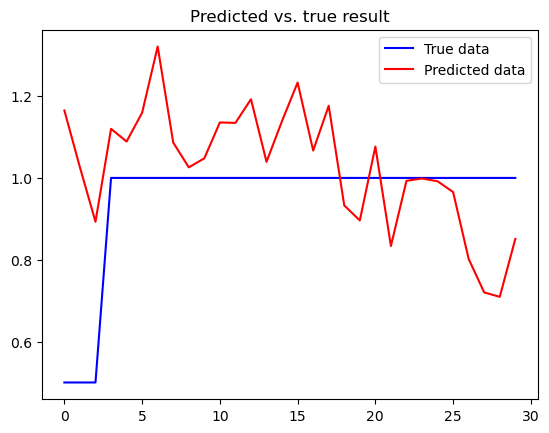

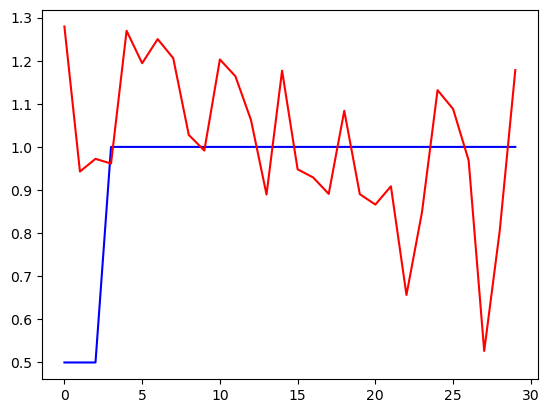

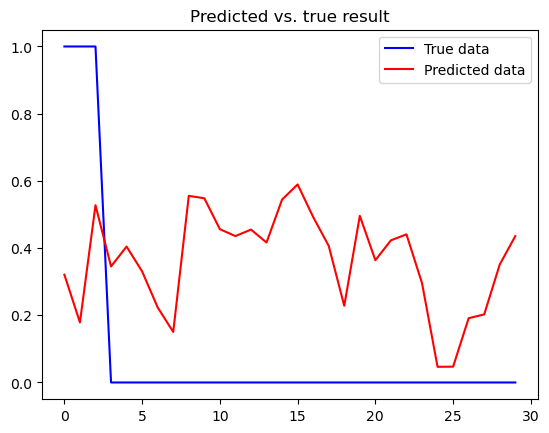

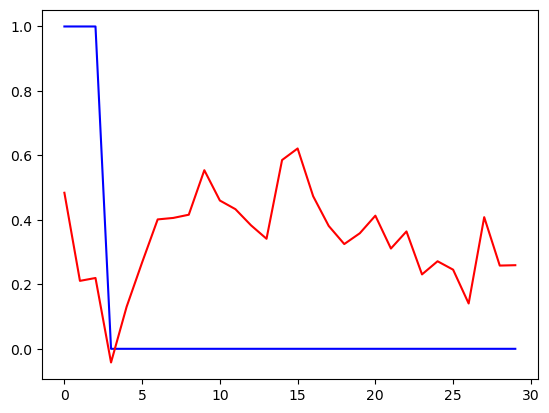

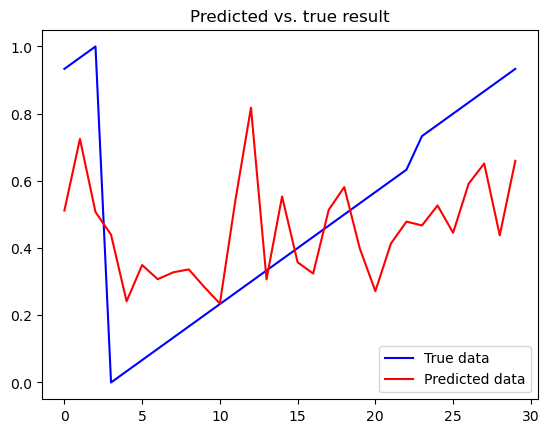

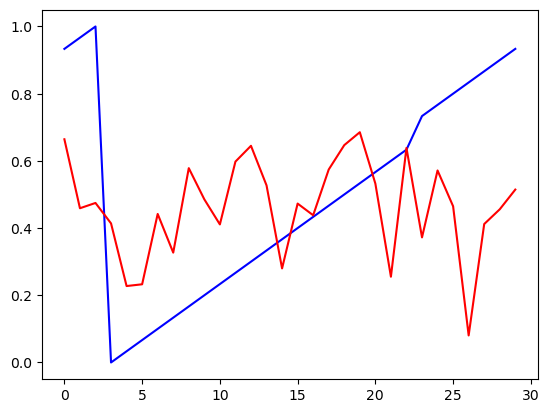

Decoder stack: 



In [2]:
runner.generate_report(train_dataset,device_id,path="./dumps")